In [1]:
import os
import h5py
import numpy as np
from brainspace.gradient import GradientMaps
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plot_funcs

# fdr correction

In [2]:
def FDR_sofie(p, q):
    # p : 1D np array, vector of p-values
    # q : float, false discovery rate level
    p = np.sort(p)
    V = len(p)
    I = np.arange(1,V+1)

    cVID = 1
    cVN  = (1 / np.arange(1,V+1)).sum()

    pID  = p[np.max(np.where(p <= (I / V*q / cVID)))]
    pN   = np.where(p <= (I / V*q / cVN))
    
    return pID, pN

# Heritability of Gradients

### G1 LSUB

In [3]:
fname = '../solar/msm50_G1_LSUB/G1_LSUB_results_herit.txt'

g1_lsub_herit = pd.read_csv(fname,
                            index_col = 0,
                            header = 0)

g1_lsub_herit.index.name = 'node'

In [4]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [5]:
df_g1_lsub_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])

In [6]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = g1_lsub_herit.index.get_loc(nodeID)
    iB = df_g1_lsub_herit.index.get_loc(nodeID)

    df_g1_lsub_herit.iloc[iB]['H2r'] = g1_lsub_herit.iloc[iA]['H2r']
    df_g1_lsub_herit.iloc[iB]['rp']  = g1_lsub_herit.iloc[iA]['rp']


In [12]:
#df_g1_lsub_herit

In [7]:
data = np.array(df_g1_lsub_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

pID

0.006589

In [10]:
data = np.array(df_g1_lsub_herit['rp'], dtype = 'float')

len(np.where(data <= pID)[0])

140

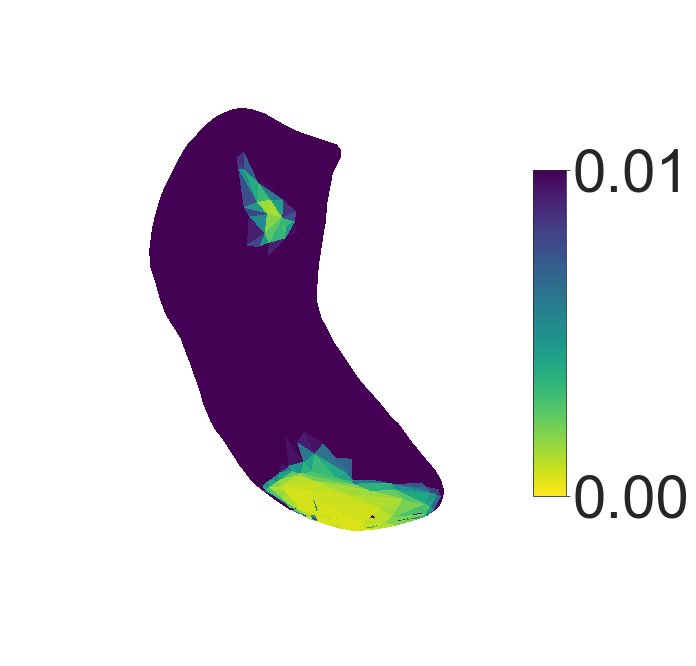

In [11]:
fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   data,
                                   'viridis_r',
                                   0, pID)


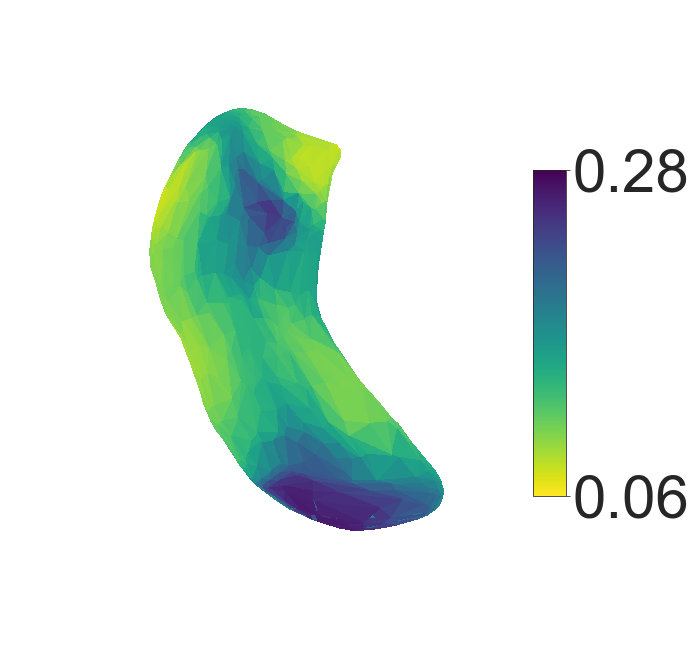

In [12]:
data = np.array(df_g1_lsub_herit['H2r'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLSUB, 
                                   plot_funcs.yLSUB, 
                                   plot_funcs.zLSUB, 
                                   plot_funcs.triLSUB, 
                                   data,
                                   'viridis_r',
                                   data.min(), data.max())


### G1 LCA

In [13]:
fname = '../solar/msm50_G1_LCA/G1_LCA_results_herit.txt'

g1_lca_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g1_lca_herit.index.name = 'node'

In [14]:
tot_node_num_lsub = 2048
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

2048


(1, '...', 2048)

In [15]:
df_g1_lca_herit = pd.DataFrame(index = node_str,
                               columns = ['H2r', 'rp'])

In [16]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = g1_lca_herit.index.get_loc(nodeID)
    iB = df_g1_lca_herit.index.get_loc(nodeID)

    df_g1_lca_herit.iloc[iB]['H2r'] = g1_lca_herit.iloc[iA]['H2r']
    df_g1_lca_herit.iloc[iB]['rp']  = g1_lca_herit.iloc[iA]['rp']


In [21]:
data = np.array(df_g1_lca_herit['rp'], dtype = 'float')

p = data

q = 0.1

pID, pN = FDR_sofie(p, q)

pID

0.0583692

### G1 LDG

In [22]:
fname = '../solar/msm50_G1_LDG/G1_LDG_results_herit.txt'

g1_ldg_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g1_ldg_herit.index.name = 'node'


In [23]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [24]:
df_g1_ldg_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])

In [25]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = g1_ldg_herit.index.get_loc(nodeID)
    iB = df_g1_ldg_herit.index.get_loc(nodeID)

    df_g1_ldg_herit.iloc[iB]['H2r'] = g1_ldg_herit.iloc[iA]['H2r']
    df_g1_ldg_herit.iloc[iB]['rp']  = g1_ldg_herit.iloc[iA]['rp']


In [29]:
data = np.array(df_g1_ldg_herit['rp'], dtype = 'float')

p = data

q = 0.5

pID, pN = FDR_sofie(p, q)

pID


0.5

### G1, RSUB

In [30]:
fname = '../solar/msm50_G1_RSUB/G1_RSUB_results_herit.txt'

g1_rsub_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g1_rsub_herit.index.name = 'node'

tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

df_g1_rsub_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])


for nodeID in range(1, tot_node_num_lsub+1):

    iA = g1_rsub_herit.index.get_loc(nodeID)
    iB = df_g1_rsub_herit.index.get_loc(nodeID)

    df_g1_rsub_herit.iloc[iB]['H2r'] = g1_rsub_herit.iloc[iA]['H2r']
    df_g1_rsub_herit.iloc[iB]['rp']  = g1_rsub_herit.iloc[iA]['rp']


1024


In [31]:
data = np.array(df_g1_rsub_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

print(pID)
len(np.where(data <= pID)[0])


0.025398900000000002


521

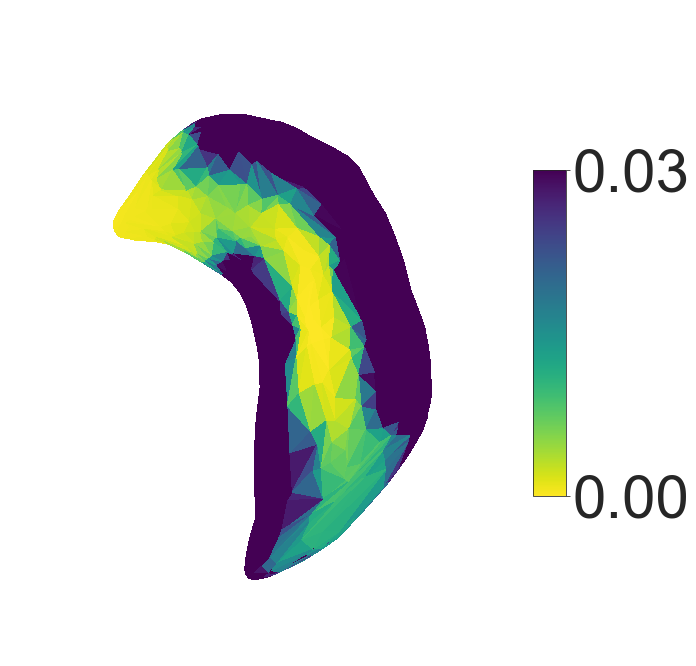

In [32]:
data = np.array(df_g1_rsub_herit['rp'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                   plot_funcs.yRSUB, 
                                   plot_funcs.zRSUB, 
                                   plot_funcs.triRSUB, 
                                   data,
                                   'viridis_r',
                                   0, pID)

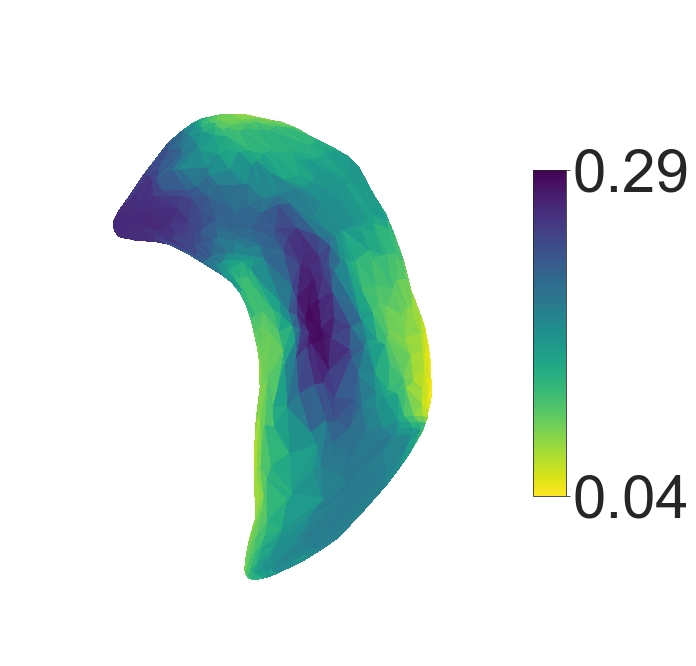

In [33]:
data = np.array(df_g1_rsub_herit['H2r'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                   plot_funcs.yRSUB, 
                                   plot_funcs.zRSUB, 
                                   plot_funcs.triRSUB, 
                                   data,
                                   'viridis_r',
                                   data.min(), data.max())

### G1 RCA

In [34]:
fname = '../solar/msm50_G1_RCA/G1_RCA_results_herit.txt'

g1_rca_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g1_rca_herit.index.name = 'node'

tot_node_num_lsub = 2048
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

df_g1_rca_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])


for nodeID in range(1, tot_node_num_lsub+1):

    iA = g1_rca_herit.index.get_loc(nodeID)
    iB = df_g1_rca_herit.index.get_loc(nodeID)

    df_g1_rca_herit.iloc[iB]['H2r'] = g1_rca_herit.iloc[iA]['H2r']
    df_g1_rca_herit.iloc[iB]['rp']  = g1_rca_herit.iloc[iA]['rp']


2048


In [35]:
data = np.array(df_g1_rca_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

print(pID)
len(np.where(data <= pID)[0])


0.0277491


1139

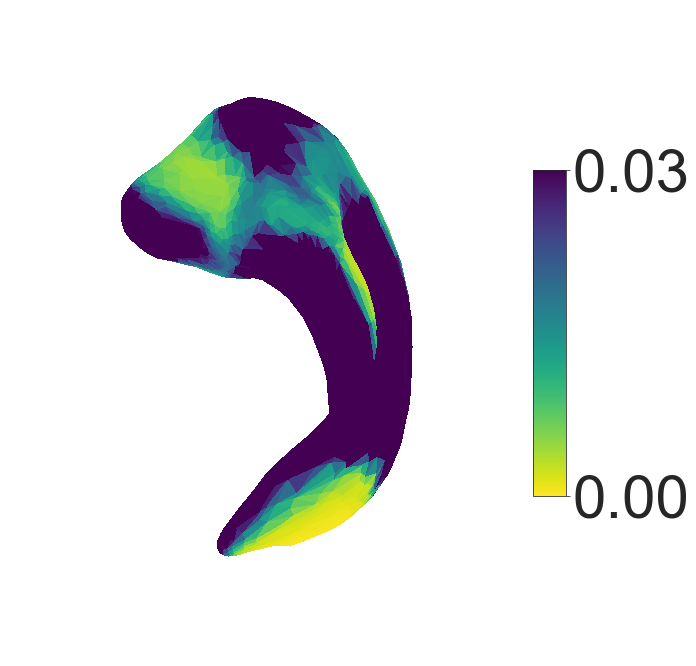

In [36]:
data = np.array(df_g1_rca_herit['rp'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                   plot_funcs.yRCA, 
                                   plot_funcs.zRCA, 
                                   plot_funcs.triRCA, 
                                   data,
                                   'viridis_r',
                                   0, pID)
    

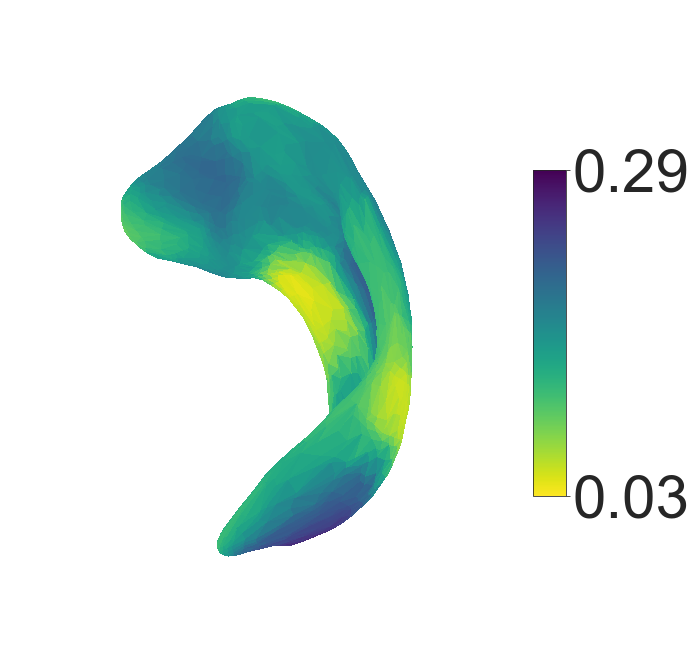

In [37]:
data = np.array(df_g1_rca_herit['H2r'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRCA, 
                                   plot_funcs.yRCA, 
                                   plot_funcs.zRCA, 
                                   plot_funcs.triRCA, 
                                   data,
                                   'viridis_r',
                                   data.min(), data.max())



### G1 RDG

In [38]:
fname = '../solar/msm50_G1_RDG/G1_RDG_results_herit.txt'

g1_rdg_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g1_rdg_herit.index.name = 'node'

tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

df_g1_rdg_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])


for nodeID in range(1, tot_node_num_lsub+1):

    iA = g1_rdg_herit.index.get_loc(nodeID)
    iB = df_g1_rdg_herit.index.get_loc(nodeID)

    df_g1_rdg_herit.iloc[iB]['H2r'] = g1_rdg_herit.iloc[iA]['H2r']
    df_g1_rdg_herit.iloc[iB]['rp']  = g1_rdg_herit.iloc[iA]['rp']


1024


In [41]:
data = np.array(df_g1_rdg_herit['rp'], dtype = 'float')

p = data

q = 0.9

pID, pN = FDR_sofie(p, q)

print(pID)
len(np.where(data <= pID)[0])


0.5


1023

### G2 LSUB

In [42]:
fname = '../solar/msm50_G2_LSUB/G2_LSUB_results_herit.txt'

g2_lsub_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g2_lsub_herit.index.name = 'node'


In [43]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [44]:
df_g2_lsub_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])

In [45]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = g2_lsub_herit.index.get_loc(nodeID)
    iB = df_g2_lsub_herit.index.get_loc(nodeID)

    df_g2_lsub_herit.iloc[iB]['H2r'] = g2_lsub_herit.iloc[iA]['H2r']
    df_g2_lsub_herit.iloc[iB]['rp']  = g2_lsub_herit.iloc[iA]['rp']


In [48]:
data = np.array(df_g2_lsub_herit['rp'], dtype = 'float')

p = data

q = 0.8

pID, pN = FDR_sofie(p, q)

pID


0.5

### G2 LCA

In [49]:
fname = '../solar/msm50_G2_LCA/G2_LCA_results_herit.txt'

g2_lca_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g2_lca_herit.index.name = 'node'


In [50]:
np.where(np.isnan(g2_lca_herit['H2r']))

(array([ 385,  674,  835, 1002]),)

In [51]:
tot_node_num_lsub = 2048
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

2048


(1, '...', 2048)

In [52]:
df_g2_lca_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])

In [53]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = g2_lca_herit.index.get_loc(nodeID)
    iB = df_g2_lca_herit.index.get_loc(nodeID)

    df_g2_lca_herit.iloc[iB]['H2r'] = g2_lca_herit.iloc[iA]['H2r']
    df_g2_lca_herit.iloc[iB]['rp']  = g2_lca_herit.iloc[iA]['rp']


In [54]:
data = np.array(df_g2_lca_herit['rp'], dtype = 'float')

p = data

q = 0.05


pID, pN = FDR_sofie(p, q)

pID


0.0072765

In [55]:
len(np.where(data <= pID)[0])

307

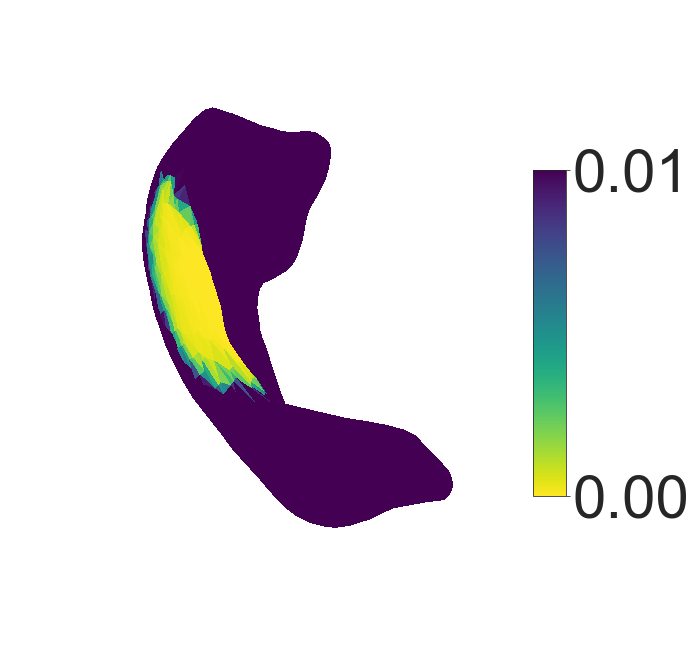

In [56]:
data = np.array(df_g2_lca_herit['rp'], dtype = 'float')


fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   data,
                                   'viridis_r',
                                   0, pID)


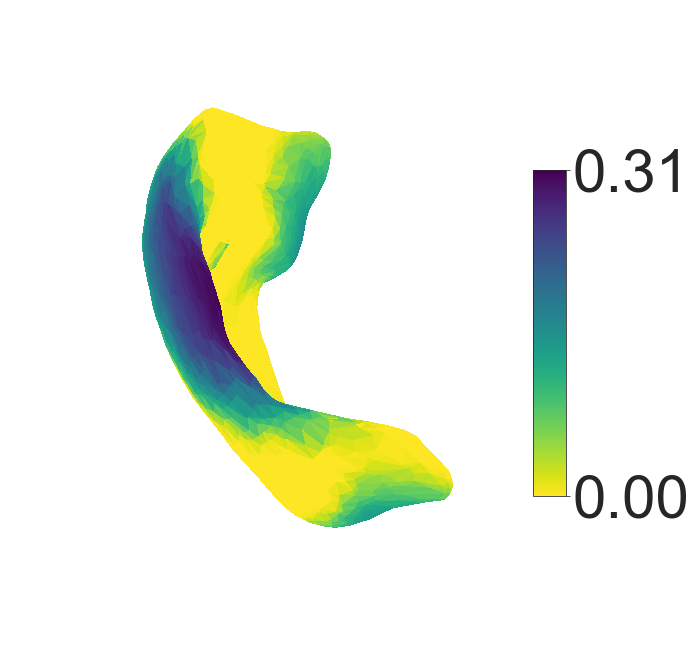

In [57]:
data = np.array(df_g2_lca_herit['H2r'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xLCA, 
                                   plot_funcs.yLCA, 
                                   plot_funcs.zLCA, 
                                   plot_funcs.triLCA, 
                                   data,
                                   'viridis_r',
                                   np.nanmin(data), np.nanmax(data))

### G2 LDG

In [59]:
fname = '../solar/msm50_G2_LDG/G2_LDG_results_herit.txt'

g2_ldg_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g2_ldg_herit.index.name = 'node'


In [60]:
tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

1024


(1, '...', 1024)

In [61]:
df_g2_ldg_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])

In [62]:
for nodeID in range(1, tot_node_num_lsub+1):

    iA = g2_ldg_herit.index.get_loc(nodeID)
    iB = df_g2_ldg_herit.index.get_loc(nodeID)

    df_g2_ldg_herit.iloc[iB]['H2r'] = g2_ldg_herit.iloc[iA]['H2r']
    df_g2_ldg_herit.iloc[iB]['rp']  = g2_ldg_herit.iloc[iA]['rp']


In [66]:
data = np.array(df_g2_ldg_herit['rp'], dtype = 'float')

p = data

q = 0.6

pID, pN = FDR_sofie(p, q)

pID


0.5

### G2 RSUB 

In [68]:
fname = '../solar/msm50_G2_RSUB/G2_RSUB_results_herit.txt'

g2_rsub_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g2_rsub_herit.index.name = 'node'

tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

df_g2_rsub_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])


for nodeID in range(1, tot_node_num_lsub+1):

    iA = g2_rsub_herit.index.get_loc(nodeID)
    iB = df_g2_rsub_herit.index.get_loc(nodeID)

    df_g2_rsub_herit.iloc[iB]['H2r'] = g2_rsub_herit.iloc[iA]['H2r']
    df_g2_rsub_herit.iloc[iB]['rp']  = g2_rsub_herit.iloc[iA]['rp']


1024


In [69]:
data = np.array(df_g2_rsub_herit['rp'], dtype = 'float')

p = data

q = 0.05

pID, pN = FDR_sofie(p, q)

print(pID)
len(np.where(data <= pID)[0])


0.012498200000000001


259

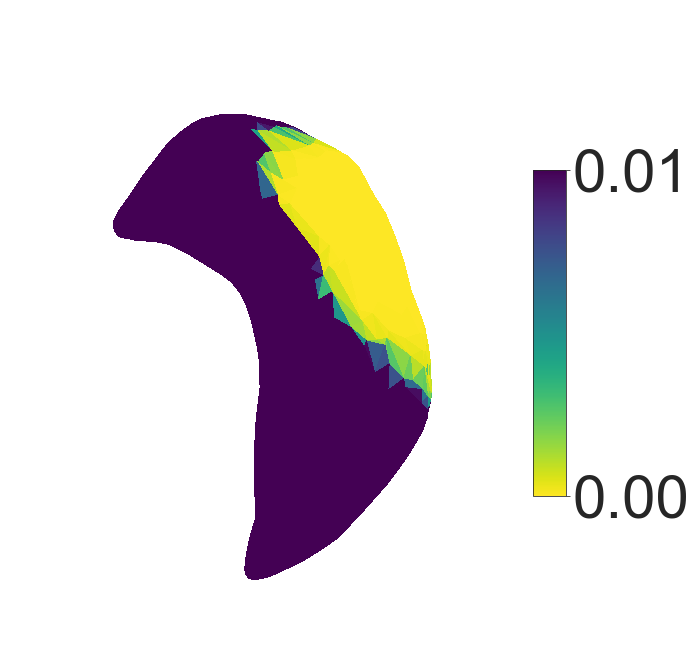

In [70]:
data = np.array(df_g2_rsub_herit['rp'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                   plot_funcs.yRSUB, 
                                   plot_funcs.zRSUB, 
                                   plot_funcs.triRSUB, 
                                   data,
                                   'viridis_r',
                                   0, pID)


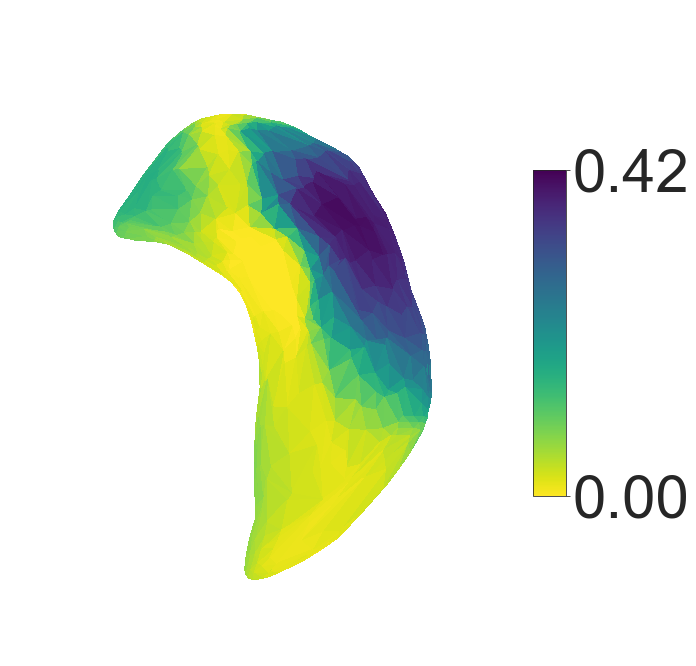

In [71]:
data = np.array(df_g2_rsub_herit['H2r'], dtype = 'float')

fig  = plot_funcs.plot_surf_upper2(plot_funcs.xRSUB, 
                                   plot_funcs.yRSUB, 
                                   plot_funcs.zRSUB, 
                                   plot_funcs.triRSUB, 
                                   data,
                                   'viridis_r',
                                   data.min(), data.max())


### G2 RCA

In [72]:
fname = '../solar/msm50_G2_RCA/G2_RCA_results_herit.txt'

g2_rca_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g2_rca_herit.index.name = 'node'

tot_node_num_lsub = 2048
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

df_g2_rca_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])


for nodeID in range(1, tot_node_num_lsub+1):

    iA = g2_rca_herit.index.get_loc(nodeID)
    iB = df_g2_rca_herit.index.get_loc(nodeID)

    df_g2_rca_herit.iloc[iB]['H2r'] = g2_rca_herit.iloc[iA]['H2r']
    df_g2_rca_herit.iloc[iB]['rp']  = g2_rca_herit.iloc[iA]['rp']


2048


In [75]:
data = np.array(df_g2_rca_herit['rp'], dtype = 'float')

p = data

q = 0.6

pID, pN = FDR_sofie(p, q)

print(pID)
len(np.where(data <= pID)[0])


0.5


2048

### G2 RDG

In [76]:
fname = '../solar/msm50_G2_RDG/G2_RDG_results_herit.txt'

g2_rdg_herit = pd.read_csv(fname,
                           index_col = 0,
                           header = 0)

g2_rdg_herit.index.name = 'node'

tot_node_num_lsub = 1024
node_str = []
for i in range(1, tot_node_num_lsub+1):
    node_str.append(i)
print(len(node_str))
node_str[0], '...', node_str[-1]

df_g2_rdg_herit = pd.DataFrame(index = node_str,
                                columns = ['H2r', 'rp'])


for nodeID in range(1, tot_node_num_lsub+1):

    iA = g2_rdg_herit.index.get_loc(nodeID)
    iB = df_g2_rdg_herit.index.get_loc(nodeID)

    df_g2_rdg_herit.iloc[iB]['H2r'] = g2_rdg_herit.iloc[iA]['H2r']
    df_g2_rdg_herit.iloc[iB]['rp']  = g2_rdg_herit.iloc[iA]['rp']


1024


In [80]:
data = np.array(g2_rdg_herit['rp'], dtype = 'float')

p = data

q = 0.8


pID, pN = FDR_sofie(p, q)

print(pID)
len(np.where(data <= pID)[0])


0.5


1022